In [73]:
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
from fastcore.utils import load_pickle
import numpy as np

plt.style.use(["science", "nature"])

colors = ["#0C5DA5", "#00B945", "#FF9500", "#FF2C00", "#845B97", "#474747", "#9e9e9e"]


In [101]:
all_runs_4_epochs = glob("results/photoswitch/*.pkl")
all_runs_2_epochs = glob("results/photoswitch_2epoch/*.pkl")
all_runs_6_epochs = glob("results/photoswitch_6epoch/*.pkl")

In [102]:
def compile_data(file):
    res = load_pickle(file)
    # model_type = res["model_type"]
    train_size = res["train_size"]
    representation = res["representation"]
    acc = res["cm"].ACC_Macro
    f1_macro = res["cm"].F1_Macro
    f1_micro = res["cm"].F1_Micro

    baseline = res["baseline"]
    baseline_acc = baseline["cm"].ACC_Macro
    baseline_f1_macro = baseline["cm"].F1_Macro
    baseline_f1_micro = baseline["cm"].F1_Micro

    return {
        "train_size": train_size,
        "representation": representation,
        "acc": acc,
        "f1_macro": f1_macro,
        "f1_micro": f1_micro,
    }, {
        "train_size": train_size,
        "acc": baseline_acc,
        "f1_macro": baseline_f1_macro,
        "f1_micro": baseline_f1_micro,
    }


In [103]:
baselines = []
results_6_epochs = []
results_4_epochs = []
results_2_epochs = []


for file in all_runs_6_epochs:
    res, baseline = compile_data(file)
    results_6_epochs.append(res)
    baselines.append(baseline)

for file in all_runs_4_epochs:
    res, baseline = compile_data(file)
    results_4_epochs.append(res)
    baselines.append(baseline)

for file in all_runs_2_epochs:
    res, baseline = compile_data(file)
    results_2_epochs.append(res)
    baselines.append(baseline)


In [104]:
baselines = pd.DataFrame(baselines)
results_6_epochs = pd.DataFrame(results_6_epochs)
results_4_epochs = pd.DataFrame(results_4_epochs)
results_2_epochs = pd.DataFrame(results_2_epochs)

results_6_epochs.replace(to_replace="None", value=np.nan, inplace=True)
results_4_epochs.replace(to_replace="None", value=np.nan, inplace=True)
results_2_epochs.replace(to_replace="None", value=np.nan, inplace=True)

results_6_epochs[["acc", "f1_micro", "f1_macro"]] = results_4_epochs[
    ["acc", "f1_micro", "f1_macro"]
].astype(float)

results_4_epochs[["acc", "f1_micro", "f1_macro"]] = results_4_epochs[
    ["acc", "f1_micro", "f1_macro"]
].astype(float)

results_2_epochs[["acc", "f1_micro", "f1_macro"]] = results_2_epochs[
    ["acc", "f1_micro", "f1_macro"]
].astype(float)


In [106]:
aggregated_6_epochs = results_6_epochs.groupby(["representation", "train_size"]).agg(
    ["mean", "std", "sem"]
)


aggregated_4_epochs = results_4_epochs.groupby(["representation", "train_size"]).agg(
    ["mean", "std", "sem"]
)

aggregated_2_epochs = results_2_epochs.groupby(["representation", "train_size"]).agg(
    ["mean", "std", "sem"]
)

baselines = baselines.groupby(["train_size"]).agg(["mean", "std", "sem"])


In [107]:
baselines


acc                      f1_macro                      \
                mean       std       sem      mean       std       sem   
train_size                                                               
10          0.728086  0.062857  0.012831  0.232114  0.161861  0.033040   
40          0.784722  0.025230  0.010300  0.541398  0.076854  0.031376   
50          0.823538  0.023736  0.005934  0.455525  0.123052  0.030763   
60          0.857143  0.059761  0.024398  0.703074  0.144153  0.058850   
70          0.827778  0.060221  0.026932  0.542386  0.084529  0.037803   
100         0.861901  0.010766  0.002691  0.594213  0.086404  0.021601   
200         0.894010  0.010203  0.002551  0.742447  0.048732  0.012183   
300         0.915507  0.015352  0.003964  0.780532  0.046613  0.012035   
350         0.903968  0.018214  0.004703  0.727006  0.097549  0.025187   

            f1_micro                      
                mean       std       sem  
train_size                                
10          0.361080  0.112847  0.023035  
40          0.569444  0.050461  0.020601  
50          0.558845  0.059339  0.014835  
60          0.714286  0.119523  0.048795  
70          0.655556  0.120442  0.053863  
100         0.654752  0.026914  0.006729  
200         0.735026  0.025507  0.006377  
300         0.797101  0.042430  0.010955  
350         0.771429  0.036886  0.009524

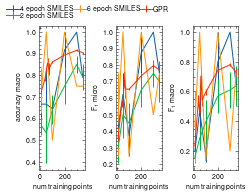

In [113]:
fig, ax = plt.subplots(1, 3, sharex="all")

smiles_6_epochs = aggregated_6_epochs.loc["SMILES"]
smiles_4_epochs = aggregated_4_epochs.loc["SMILES"]
smiles_2_epochs = aggregated_2_epochs.loc["SMILES"]

selfies_6_epochs = aggregated_6_epochs.loc["selfies"]
selfies_4_epochs = aggregated_4_epochs.loc["selfies"]
selfies_2_epochs = aggregated_2_epochs.loc["selfies"]

name_6_epochs = aggregated_6_epochs.loc["name"]
name_4_epochs = aggregated_4_epochs.loc["name"]
name_2_epochs = aggregated_2_epochs.loc["name"]


alpha = 0.4

for i, metric in enumerate(["acc", "f1_micro", "f1_macro"]):  # , "f1_macro"

    ax[i].errorbar(
        smiles_4_epochs.index,
        smiles_4_epochs[metric]["mean"],
        smiles_4_epochs[metric]["sem"],
        label="4 epoch SMILES" if i == 0 else None,
        c=colors[0],
    )

    ax[i].errorbar(
        smiles_2_epochs.index,
        smiles_2_epochs[metric]["mean"],
        smiles_2_epochs[metric]["sem"],
        label="2 epoch SMILES" if i == 0 else None,
        c=colors[1],
    )

    ax[i].errorbar(
        smiles_6_epochs.index,
        smiles_6_epochs[metric]["mean"],
        smiles_6_epochs[metric]["sem"],
        label="6 epoch SMILES" if i == 0 else None,
        c=colors[2],
    )

    ax[i].errorbar(
        baselines.index,
        baselines[metric]["mean"],
        baselines[metric]["sem"],
        label="GPR" if i == 0 else None,
        c=colors[3],
    )

    ax[i].set_xlabel("num training points")

ax[0].set_ylabel("accuracy macro")
ax[1].set_ylabel(r"F$_1$ micro")
ax[2].set_ylabel(r"F$_1$ macro")


fig.legend(
    bbox_to_anchor=(0.7, 1.1), ncol=3, handletextpad=0, labelspacing=0, columnspacing=0
)

fig.tight_layout()

fig.savefig('photoswitch_smiles_lc.pdf', bbox_inches='tight')

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


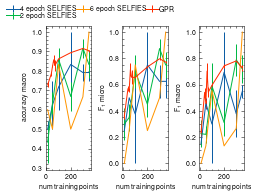

In [111]:
fig, ax = plt.subplots(1, 3, sharex="all")

alpha = 0.4

for i, metric in enumerate(["acc", "f1_micro", "f1_macro"]):  # , "f1_macro"

    ax[i].errorbar(
        selfies_4_epochs.index,
        selfies_4_epochs[metric]["mean"],
        selfies_4_epochs[metric]["sem"],
        label="4 epoch SELFIES" if i == 0 else None,
        c=colors[0],
    )

    ax[i].errorbar(
        selfies_2_epochs.index,
        selfies_2_epochs[metric]["mean"],
        selfies_2_epochs[metric]["sem"],
        label="2 epoch SELFIES" if i == 0 else None,
        c=colors[1],
    )

    ax[i].errorbar(
        selfies_6_epochs.index,
        selfies_6_epochs[metric]["mean"],
        selfies_6_epochs[metric]["sem"],
        label="6 epoch SELFIES" if i == 0 else None,
        c=colors[2],
    )

    ax[i].errorbar(
        baselines.index,
        baselines[metric]["mean"],
        baselines[metric]["sem"],
        label="GPR" if i == 0 else None,
        c=colors[3],
    )

    ax[i].set_xlabel("num training points")

ax[0].set_ylabel("accuracy macro")
ax[1].set_ylabel(r"F$_1$ micro")
ax[2].set_ylabel(r"F$_1$ macro")


fig.legend(
    bbox_to_anchor=(0.7, 1.1), ncol=3, handletextpad=0, labelspacing=0, columnspacing=0
)

fig.tight_layout()


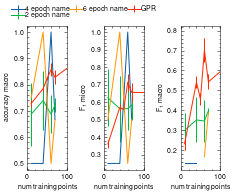

In [112]:
fig, ax = plt.subplots(1, 3, sharex="all")

alpha = 0.4

for i, metric in enumerate(["acc", "f1_micro", "f1_macro"]):  # , "f1_macro"

    ax[i].errorbar(
        name_4_epochs.index,
        name_4_epochs[metric]["mean"],
        name_4_epochs[metric]["sem"],
        label="4 epoch name" if i == 0 else None,
        c=colors[0],
    )

    ax[i].errorbar(
        name_2_epochs.index,
        name_2_epochs[metric]["mean"],
        name_2_epochs[metric]["sem"],
        label="2 epoch name" if i == 0 else None,
        c=colors[1],
    )

    ax[i].errorbar(
        name_6_epochs.index,
        name_6_epochs[metric]["mean"],
        name_6_epochs[metric]["sem"],
        label="6 epoch name" if i == 0 else None,
        c=colors[2],
    )

    ax[i].errorbar(
        baselines.index,
        baselines[metric]["mean"],
        baselines[metric]["sem"],
        label="GPR" if i == 0 else None,
        c=colors[3],
    )

    ax[i].set_xlim(0,100)

    ax[i].set_xlabel("num training points")

ax[0].set_ylabel("accuracy macro")
ax[1].set_ylabel(r"F$_1$ micro")
ax[2].set_ylabel(r"F$_1$ macro")


fig.legend(
    bbox_to_anchor=(0.7, 1.1), ncol=3, handletextpad=0, labelspacing=0, columnspacing=0
)


fig.tight_layout()
